# 데이터 시각화

----
### [ 참고자료 ] [DATA STATION - 매일 10분 데이터 분석](https://blog.naver.com/data_station/222493249123)
### [ 참고자료 ] : [Matplotlib Tutorial - 파이썬으로 데이터 시각화하기](https://wikidocs.net/book/5011)
----

In [ ]:
# 데이터 분석시 기본 라이브러리 

import pandas as pd
import seaborn as sns
import matplotlib as mpl              # 한글폰트, 글씨체, 음수기호 등 전체적인 옵션 조정
import matplotlib.pyplot as plt       # 그래프를 세부적으로 그리기 위한 옵션 설정
import missingno as msno

%matplotlib inline                    # NoteBook 내에 그래프 그리기
                                      # %matplotlib tk 는 별도의 창에 그래프를 그리고 직접 그래프의 속성을 변경할 수 있음
 

mpl.rc('font', family='Malgun Gothic')  # 한글 폰트 설정
                                        # 윈도우 폰트 위치 - C:\Windows\Fonts
plt.figure(figsize=(10,5))              # 그래프 사이즈 설정
plt.legend(loc='right')                 # 범주의 위치 조정                                        

# Data Loading

In [50]:
df1 = pd.read_csv('Data03.csv')
df1.head()

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


# 데이터 파악
* Product 렌탈시 고객의 정보 및 렌탈 내역을 정리한 데이터
* 날짜('datetime')마다 렌탈한 데이터 생성


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

In [5]:
df1.describe()  # 수치 데이터 요약

,id,Term,amount,overdue_count,credit rating,age,Mileage
count,5.130400e+04,51304.000000,51304.000000,51304.000000,42521.000000,40509.000000,40509.000000
mean,6.266457e+07,55.638527,93994.980021,0.161040,3.428894,46.608285,1967.922412
std,1.216115e+07,12.010117,15305.147334,1.122356,2.213590,13.465977,436.707329
min,2.568798e+07,12.000000,54603.000000,-1.000000,0.000000,20.000000,872.000000
25%,6.643149e+07,60.000000,81900.000000,0.000000,1.000000,37.000000,1646.000000
50%,6.676578e+07,60.000000,96900.000000,0.000000,3.000000,46.000000,1946.000000
75%,6.678161e+07,60.000000,98400.000000,0.000000,5.000000,56.000000,2263.000000
max,6.696986e+07,60.000000,215700.000000,15.000000,10.000000,107.000000,3803.000000


In [51]:
df1.isnull().sum()  # 결측치 확인 - NaN 데이터 Sum

id                       0
type_of_contract         4
type_of_contract2        1
channel                  0
datetime                 0
Term                     0
payment_type             0
product                  1
amount                   0
state                    0
overdue_count            0
overdue                  2
credit rating         8783
bank                  2760
cancellation            25
age                  10795
Mileage              10795
dtype: int64

# 결측치 시각화
missingno 라이브러리를 이용하여 결측치 시각화 

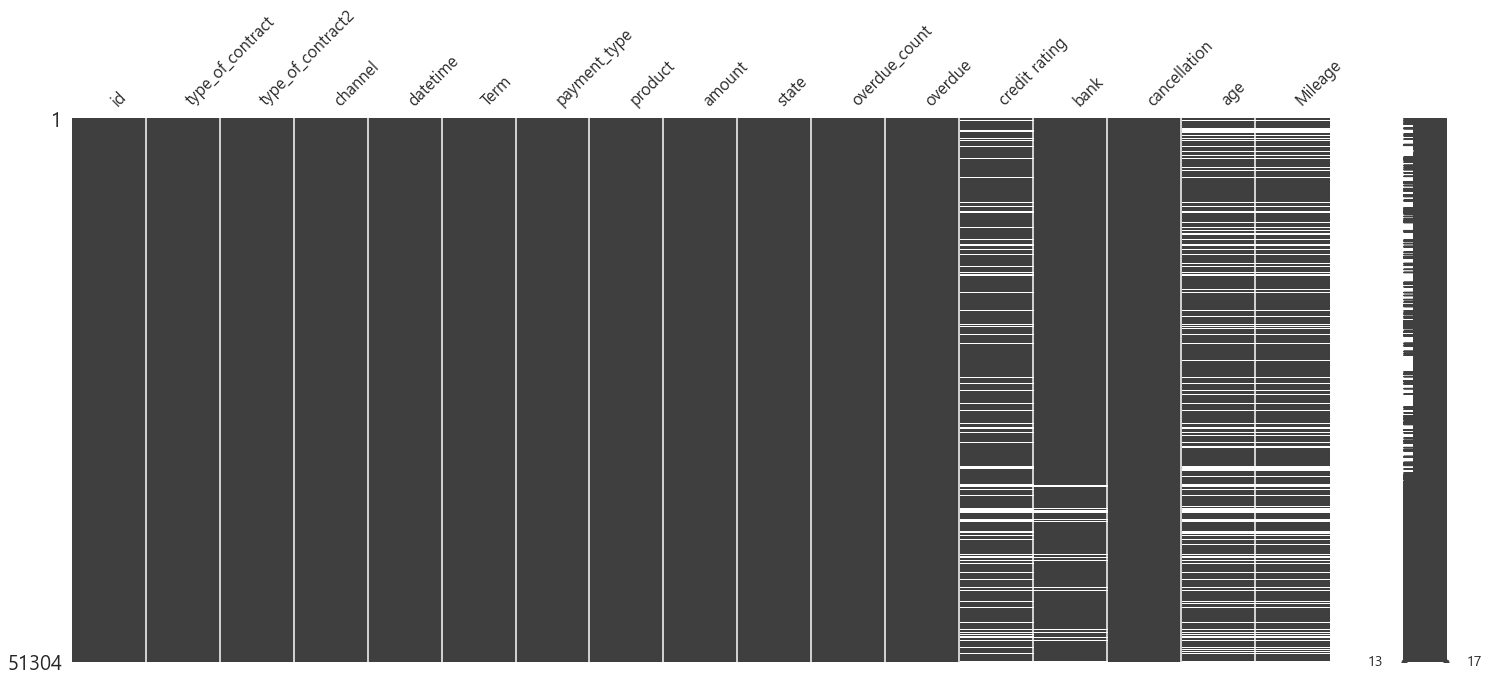

In [52]:
import missingno as msno
%matplotlib inline

msno.matrix(df1)
plt.show()

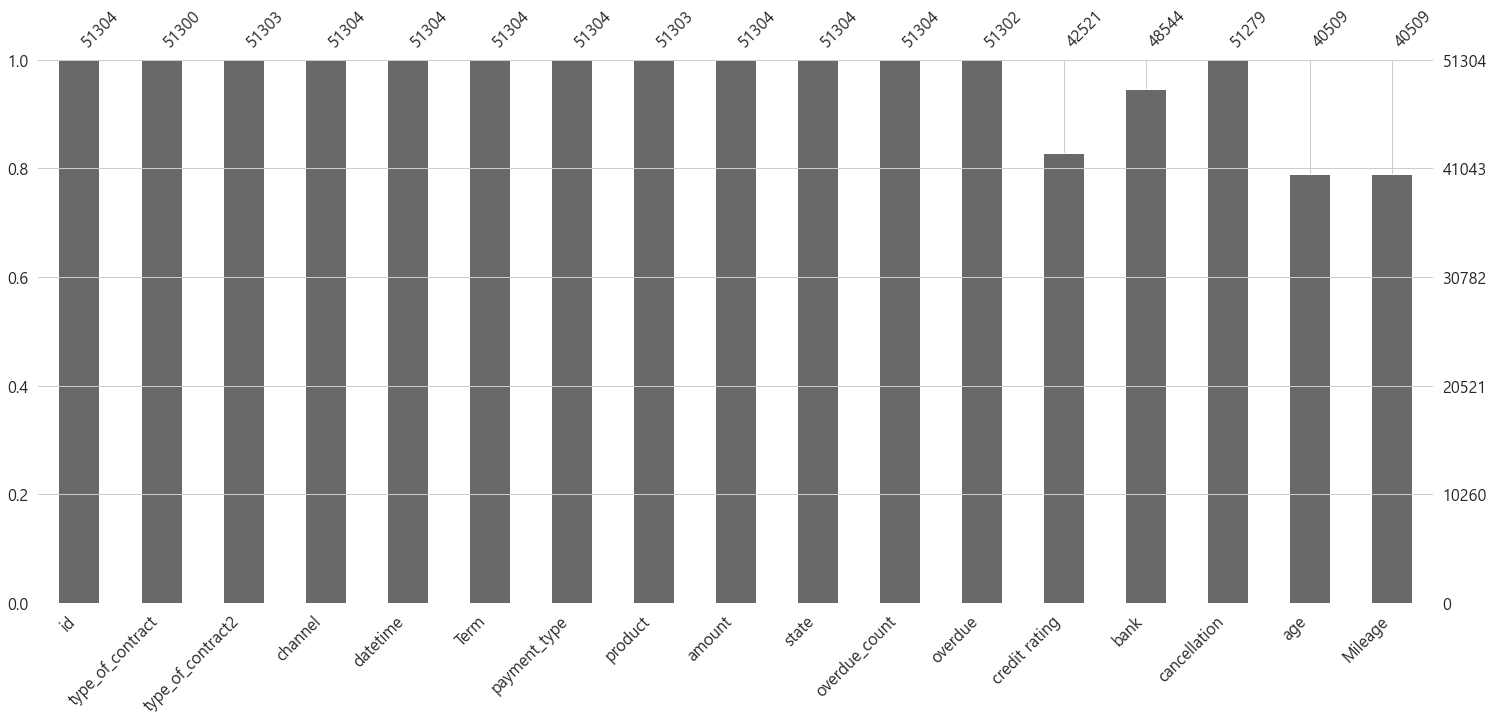

In [53]:
msno.bar(df1)
plt.show()

# 시각화(단일변수) - 범주형

## 카운트 플롯 - sns.countplot()

In [13]:
df1['type_of_contract'].value_counts()

렌탈     46481
멤버십     4819
Name: type_of_contract, dtype: int64

<AxesSubplot:xlabel='type_of_contract', ylabel='count'>

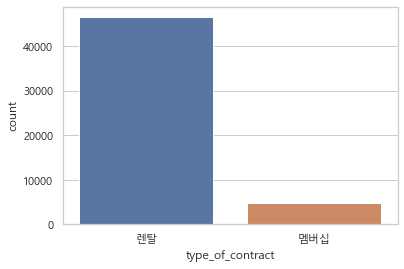

In [22]:
sns.countplot(data=df1, x='type_of_contract')

In [15]:
df1['product'].value_counts()

K1    39134
K2     8995
K3     2082
K5      645
K4      327
K6      120
Name: product, dtype: int64

In [19]:
df1['type_of_contract2'].value_counts()

Promotion           15811
Normal              15324
Package             10184
Extension_Rental     4975
TAS                  2627
TA2                  2087
Group                 190
TA3                    92
TA1                    13
Name: type_of_contract2, dtype: int64

<AxesSubplot:xlabel='product', ylabel='count'>

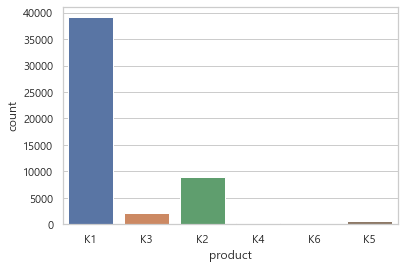

In [33]:
sns.countplot(data=df1, x='product')

### hue 옵션
* 그래프에 데이터 중복 표현
* 예시) product를 기준으로 type_of_contract를 중복하여 표현

<AxesSubplot:xlabel='product', ylabel='count'>

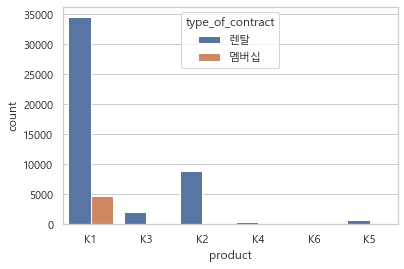

In [55]:
sns.countplot(data=df1, x='product', hue='type_of_contract')

### 범주 위치 조정
* plt.legend(loc='right')
* plt.legend()는 sns.countplot() 뒤에 나와야 적용됨

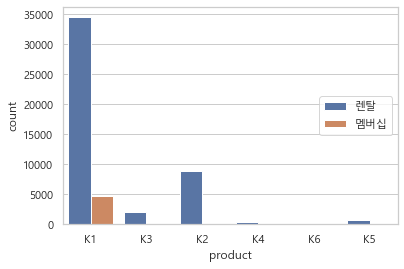

In [57]:
sns.countplot(data=df1, x='product', hue='type_of_contract')
plt.legend(loc='right')

### 그래프를 파일로 저장

In [28]:
plt.savefig('img1.png')   # 그림 파일로 저장, Visual Studio Code 에서 저장후 열어보면 안 나타남(추후 확인해 볼 필요 있음)

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.savefig('img1.pdf')   # PDF 파일로 저장

# 시각화(단일변수) - 수치형

## 히스토그램 - sns.histplot()
수치형 데이터 - age

<AxesSubplot:xlabel='age', ylabel='Count'>

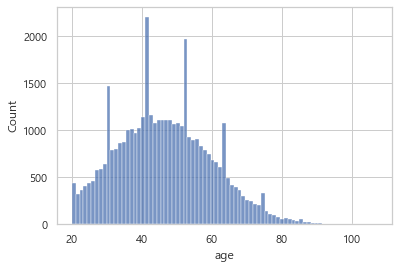

In [58]:
sns.histplot(data=df1, x='age')

### kde=True 옵션 
* 확률분포선을 같이 표현되게 함

<AxesSubplot:xlabel='age', ylabel='Count'>

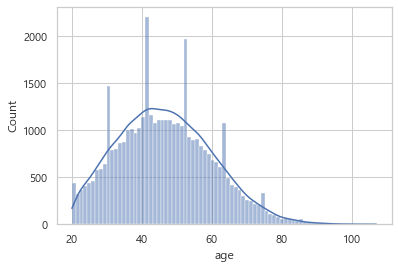

In [31]:
sns.histplot(data=df1, x='age', kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

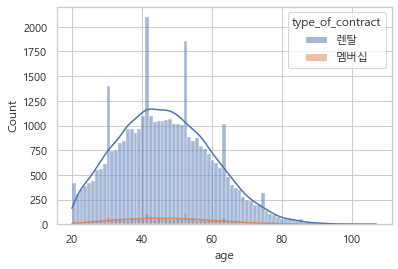

In [32]:
sns.histplot(data=df1, x='age', kde=True, hue='type_of_contract')

### 그래프의 제목(TITLE) 작성

<AxesSubplot:title={'center':'계약 유형별 고객 연령 분포'}, xlabel='age', ylabel='Count'>

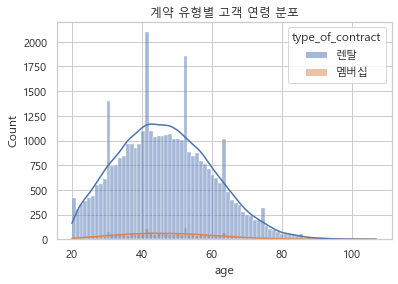

In [59]:
plt.title('계약 유형별 고객 연령 분포')
sns.histplot(data=df1, x='age', kde=True, hue='type_of_contract')

### X축에 항목이 많아 알아볼 수 없는 경우

<AxesSubplot:xlabel='bank', ylabel='count'>

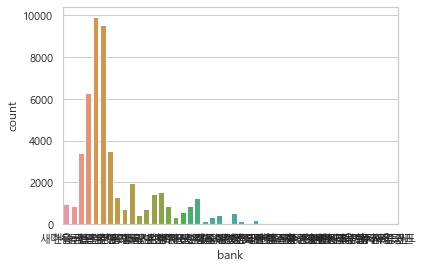

In [39]:
sns.countplot(data=df1, x='bank')

<AxesSubplot:xlabel='count', ylabel='bank'>

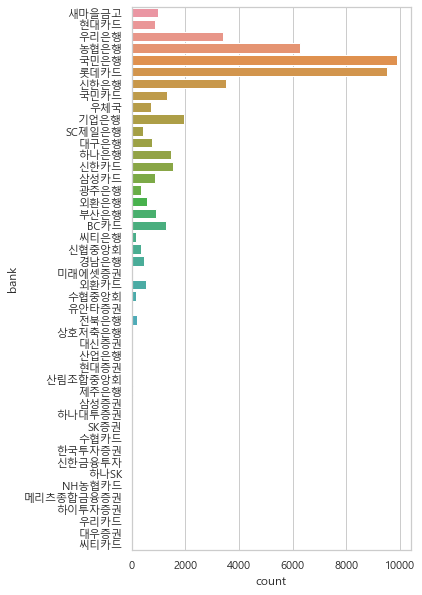

In [41]:
# 축변경 : x축을 y축으로 변경
plt.figure(figsize=[5,10])
sns.countplot(data=df1, y='bank')

### 빈도수가 많은 Data 처리 - 선택 출력

In [44]:
df1['bank'].value_counts()

국민은행         9901
롯데카드         9518
농협은행         6278
신한은행         3522
우리은행         3386
기업은행         1963
신한카드         1533
하나은행         1446
국민카드         1311
BC카드         1264
새마을금고         964
부산은행          888
삼성카드          884
현대카드          876
대구은행          746
우체국           717
외환은행          586
외환카드          530
경남은행          442
SC제일은행        439
광주은행          347
신협중앙회         341
전북은행          195
씨티은행          162
수협중앙회         160
제주은행           40
유안타증권          27
산업은행           23
현대증권           11
삼성증권            7
하나SK            6
미래에셋증권          5
신한금융투자          4
한국투자증권          4
NH농협카드          4
우리카드            3
대우증권            2
상호저축은행          1
산림조합중앙회         1
씨티카드            1
하나대투증권          1
수협카드            1
SK증권            1
하이투자증권          1
대신증권            1
메리츠종합금융증권       1
Name: bank, dtype: int64

<AxesSubplot:xlabel='bank', ylabel='count'>

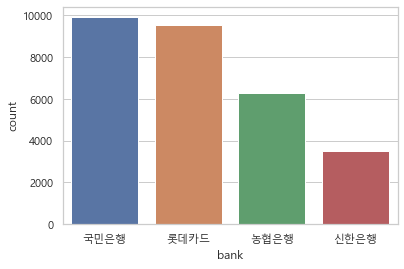

In [60]:
sns.countplot(data=df1, x='bank', order=['국민은행','롯데카드','농협은행','신한은행'])

### 데이터를 순서적으로, 선택해서 출력
* order_list = value_counts().index.tolist() 를 order 옵션에 사용
* 갯수의 경우 order_list를 슬라이싱 해서 조정

In [62]:
order_list = df1['bank'].value_counts().index.tolist()

<AxesSubplot:xlabel='bank', ylabel='count'>

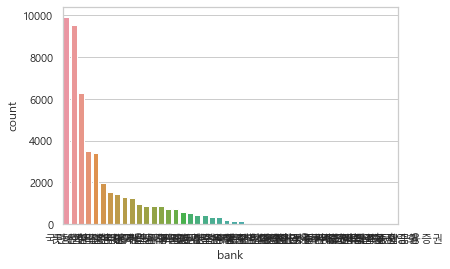

In [63]:
sns.countplot(data=df1, x='bank', order=order_list)

<AxesSubplot:xlabel='count', ylabel='bank'>

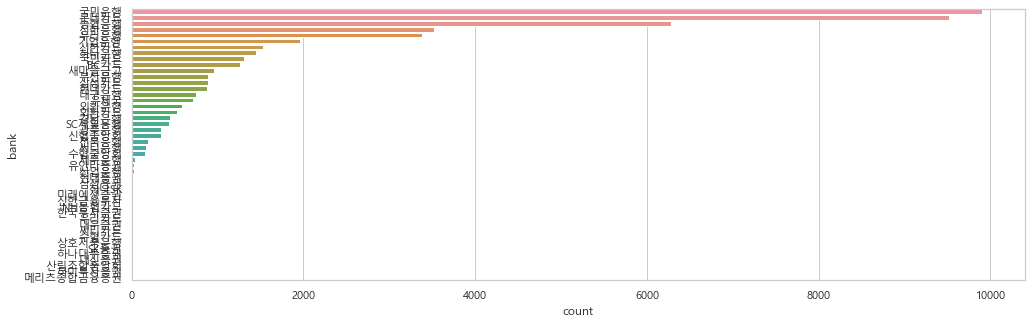

In [66]:
plt.figure(figsize=(16,5))
sns.countplot(data=df1, y='bank', order=order_list)

<AxesSubplot:xlabel='bank', ylabel='count'>

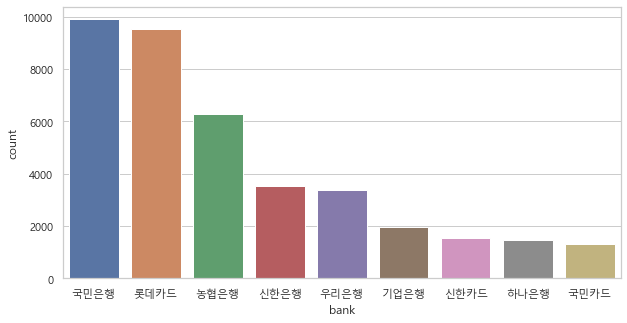

In [67]:
# order_list 슬라이싱을 통한 출력 갯수 제한
plt.figure(figsize=(10,5))
sns.countplot(data=df1, x='bank', order=order_list[:9])

# 시각화(다변수) - X:연속 / Y:연속 

## 산점도(scatter) - sns.scatterplot()

<AxesSubplot:xlabel='age', ylabel='Mileage'>

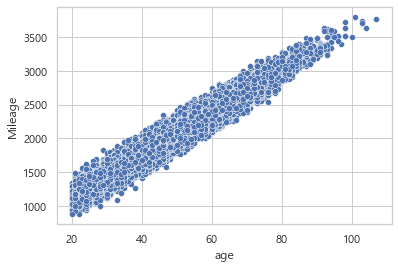

In [62]:
sns.scatterplot(data=df1, x='age', y='Mileage')

### Scatter 의 데이터 overlay - 범주형 데이터(type_of_contract)

<AxesSubplot:xlabel='age', ylabel='Mileage'>

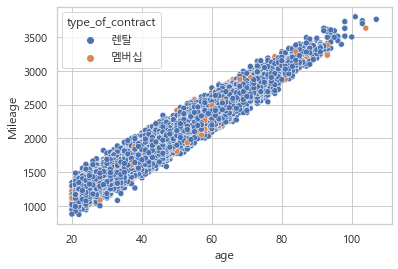

In [63]:
sns.scatterplot(data=df1, x='age', y='Mileage', hue = 'type_of_contract')

### size 옵션을 통해 데이터 표현 - 3개의 데이터를 한 그래프로 표현

<AxesSubplot:xlabel='age', ylabel='Mileage'>

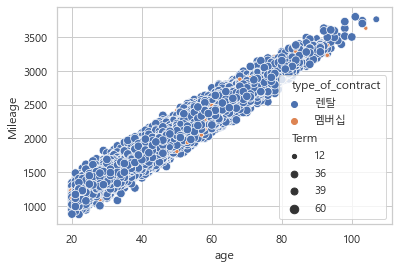

In [64]:
sns.scatterplot(data=df1, x='age', y='Mileage', hue = 'type_of_contract', size='Term')

## 회귀선 - lmplot()

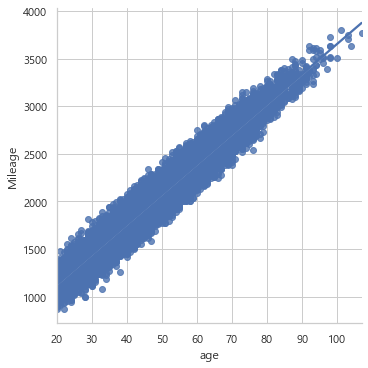

In [65]:
sns.lmplot(data=df1, x='age', y='Mileage')

### hue 옵션을 통해 데이터 추가 표현

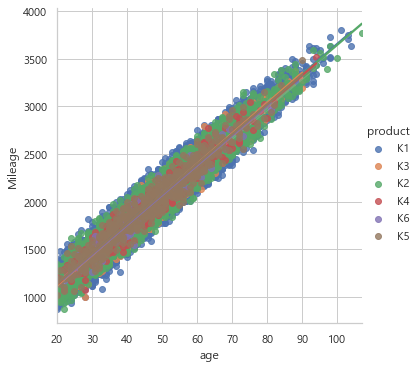

In [69]:
sns.lmplot(data=df1, x='age', y='Mileage', hue='product')

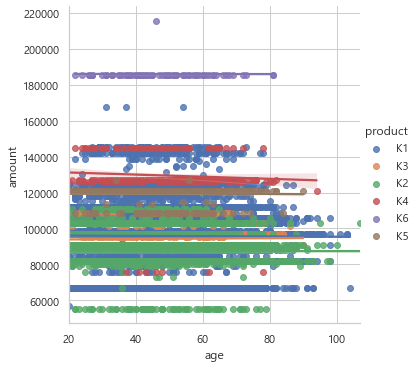

In [70]:
sns.lmplot(data=df1, x='age', y='amount', hue='product')

## jointplot() - 산점도 와 분포도를 같이 표현


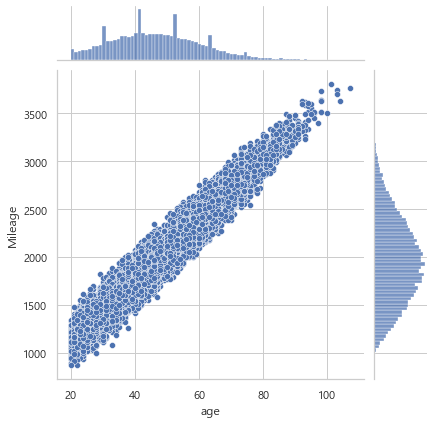

In [72]:
sns.jointplot(data=df1, x='age', y='Mileage')

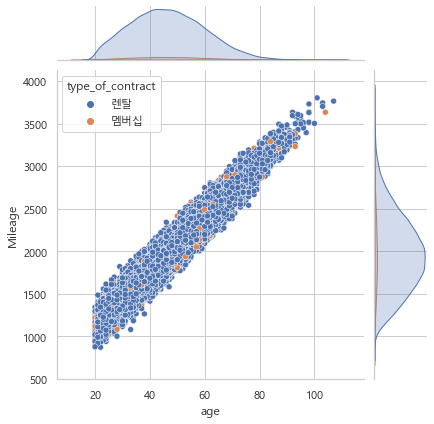

In [74]:
sns.jointplot(data=df1, x='age', y='Mileage', hue='type_of_contract')

## 상관분석 pairplot() - 연속형 변수를 이용하여 산점도와 분포를 출력
* 변수간의 상관관계를 전체적으로 볼 수 있음 - 상관분석

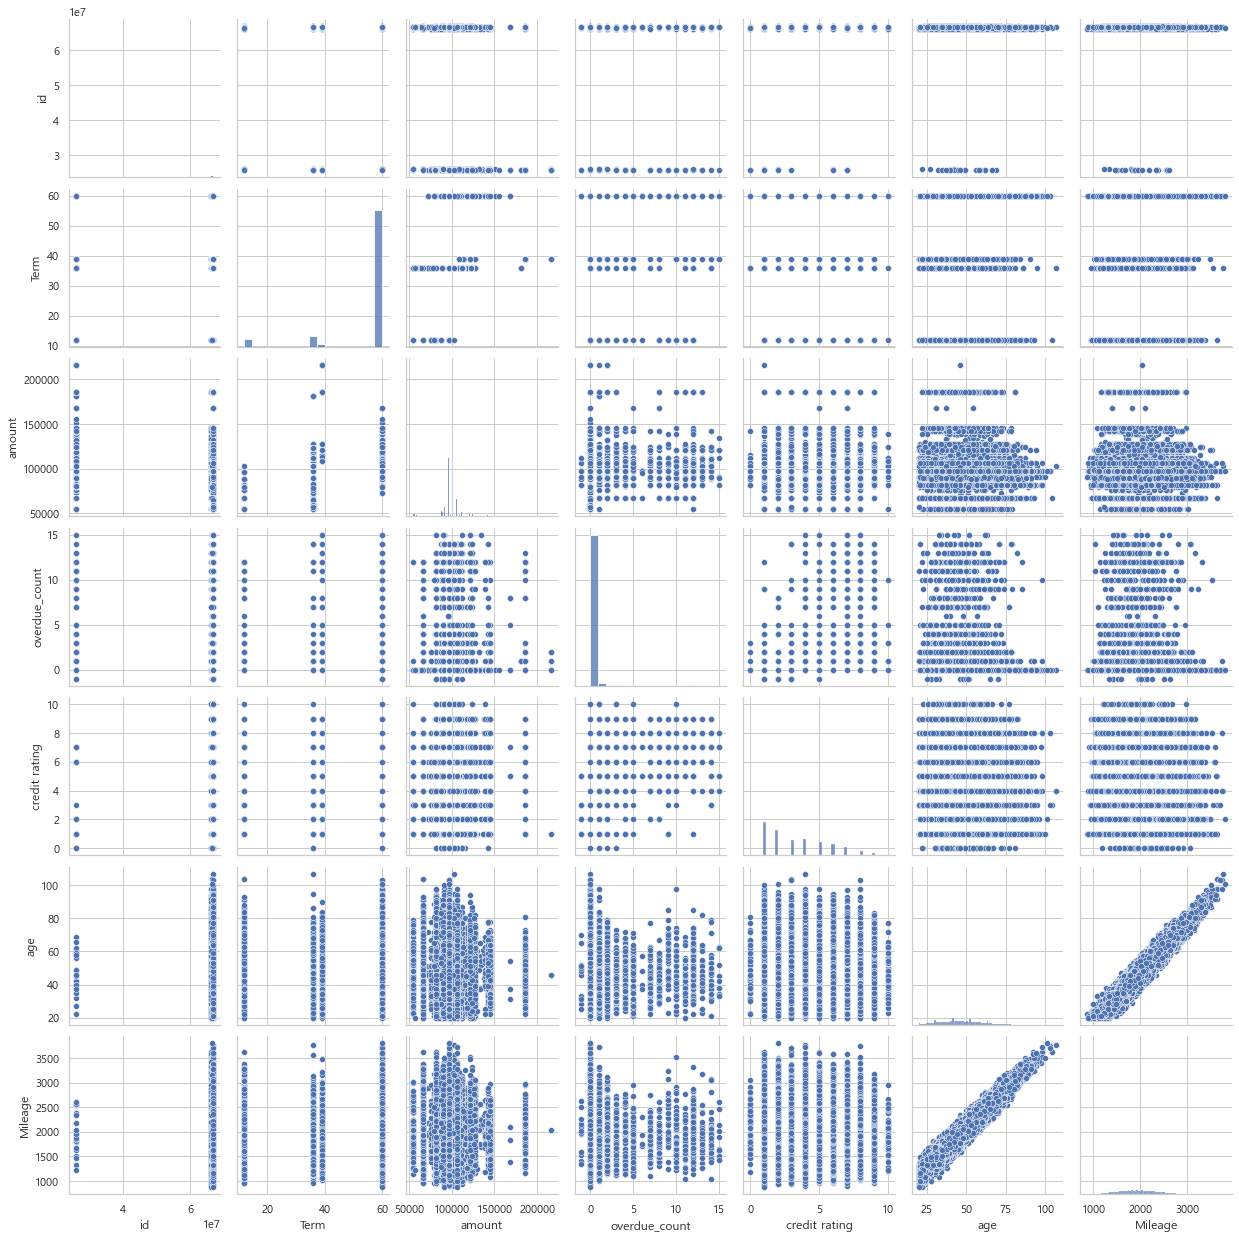

In [75]:
sns.pairplot(df1)

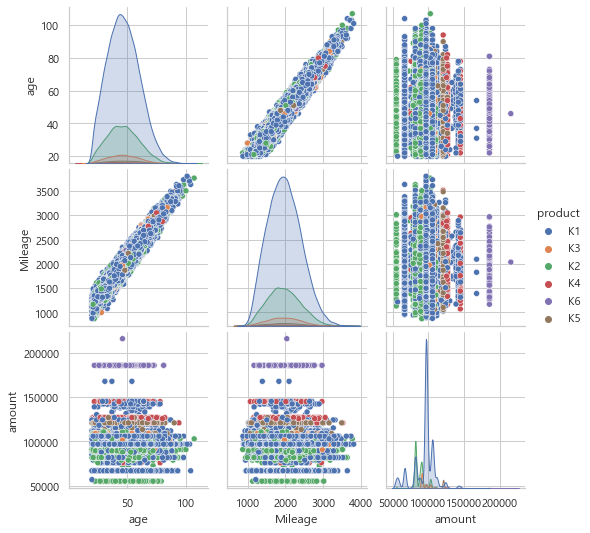

In [79]:
sns.pairplot(df1[['age','Mileage','amount','product']], hue='product')

### 상관계수 출력
* -1 ~ 1 의 값을 가지며 1 에 가까울 수록 양의 상관관계, -1로 가까워 질수록 음의 상관관계가 있다고 하며 0에 가까운 경우 상관관계가 없다고 봄.
* pairplot()을 그리기전에 먼저 상관계수를 확인(df1.corr())하여 분석

In [68]:
df1.corr()   # 숫자형 데이터만 출력됨

,id,Term,amount,overdue_count,credit rating,age,Mileage
id,1.000000,0.018640,-0.162013,-0.011126,0.010875,0.000030,-0.000965
Term,0.018640,1.000000,0.465662,-0.013498,-0.042443,-0.008474,-0.007871
amount,-0.162013,0.465662,1.000000,0.075492,-0.017583,-0.003537,-0.004146
overdue_count,-0.011126,-0.013498,0.075492,1.000000,0.202012,-0.001720,-0.002637
credit rating,0.010875,-0.042443,-0.017583,0.202012,1.000000,0.004609,0.002921
age,0.000030,-0.008474,-0.003537,-0.001720,0.004609,1.000000,0.973281
Mileage,-0.000965,-0.007871,-0.004146,-0.002637,0.002921,0.973281,1.000000


In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

# 시각화(다변수) - X:범주형 / Y:연속 
  * Barplot / Boxplot

In [71]:
p1 = pd.pivot_table(data=df1, index='channel', values='amount', aggfunc='sum')
p1.sort_values(by='amount', ascending=False)[:10]

,amount
channel,
서비스 방문,1496420760
홈쇼핑/방송,1156173900
렌탈총판,565189800
R관리방판,458556039
영업방판,322955100
하이마트,234002706
렌탈재계약,147318600
일반,124029000
전자랜드,118252200


In [94]:
df1['channel'].value_counts()

서비스 방문     15186
홈쇼핑/방송     12977
렌탈총판        5544
R관리방판       4727
하이마트        3227
영업방판        3039
렌탈재계약       2193
일반          1232
전자랜드        1205
R빌리미         560
이마트          265
홈플러스         225
R인터넷         198
R유통사         188
홈쇼핑/인터넷      177
R렌탈운영        120
R농협          119
R농협인터넷몰       83
R법인그룹         20
R법인           19
Name: channel, dtype: int64

In [72]:
# 매출액이 높은 상위 Top N개 list 생성
top_list = p1.sort_values(by='amount', ascending=False)[:5].index.tolist()

## barplot()

<AxesSubplot:xlabel='channel', ylabel='amount'>

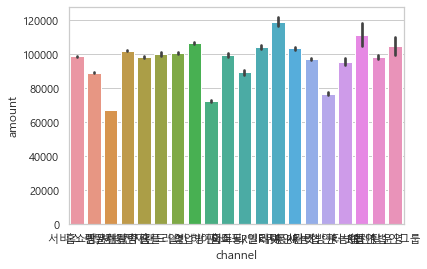

In [73]:
sns.barplot(data=df1, x='channel', y='amount')  # 기본 : mean(평균)

<AxesSubplot:xlabel='channel', ylabel='amount'>

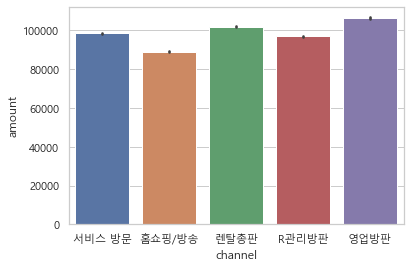

In [98]:
sns.barplot(data=df1, x='channel', y='amount', order=top_list)  # 기본 : mean(평균)

### estimator 옵션 : 기본인 평균을 SUM(합계)로 변경

### ci 옵션 : 막대상자위 검은선은 신뢰구간(confidence interval)이 자동으로 출력되나 출력하고 싶지 않을 떄 사용

<AxesSubplot:xlabel='channel', ylabel='amount'>

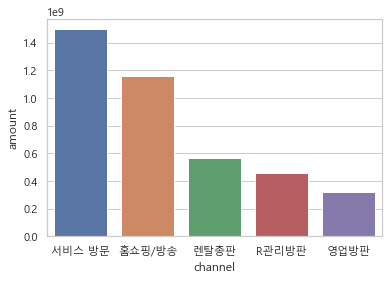

In [74]:
sns.barplot(data=df1, x='channel', y='amount', order=top_list, estimator=sum, ci=None)  # 기본 : mean(평균)

### barplot() 에서 데이터 Overlay

<AxesSubplot:xlabel='channel', ylabel='amount'>

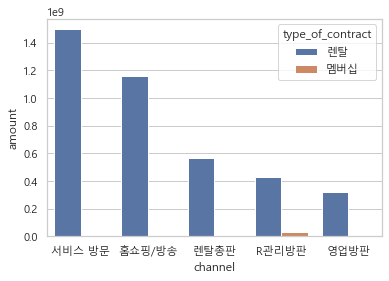

In [75]:
sns.barplot(data=df1, x='channel', y='amount', order=top_list, estimator=sum, ci=None, hue='type_of_contract')

## boxplot()

<AxesSubplot:xlabel='channel', ylabel='amount'>

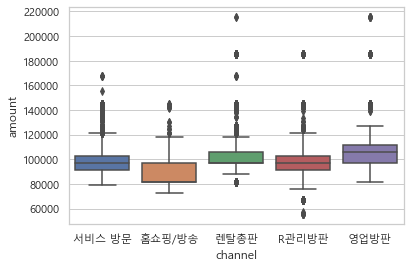

In [76]:
sns.boxplot(data=df1, x='channel', y='amount', order=top_list)

# 시각화(다변수) - 순서형, 시간 데이터 

### object type을 datetime type으로 변환

In [77]:
df1['datetime(timestamp)'] = pd.to_datetime(df1['datetime'])

## lineplot()

<AxesSubplot:xlabel='datetime(timestamp)', ylabel='amount'>

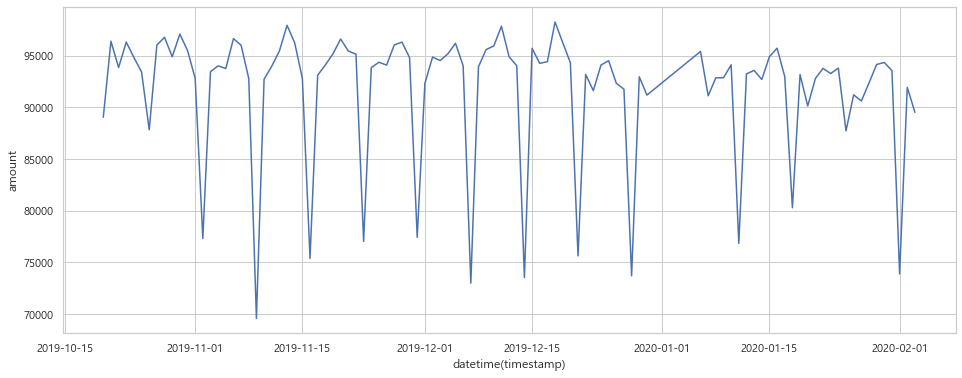

In [78]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df1, x='datetime(timestamp)', y = 'amount', ci=None) # 기본: mean(평균)

<AxesSubplot:xlabel='datetime(timestamp)', ylabel='amount'>

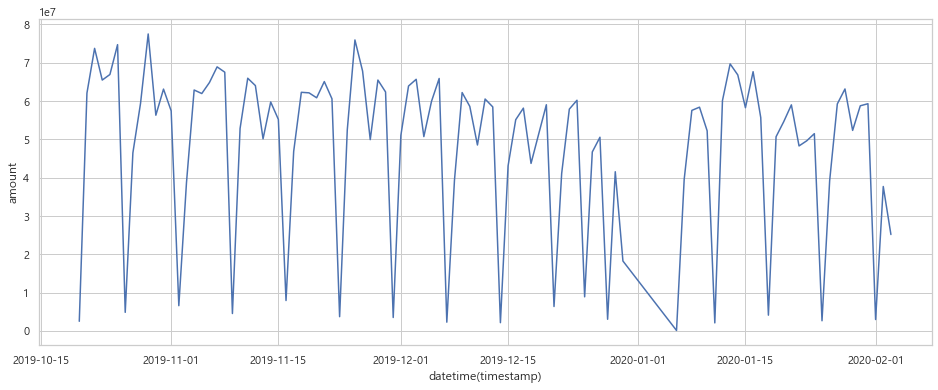

In [79]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df1, x='datetime(timestamp)', y = 'amount', ci=None, estimator=sum) 

## 그래프의 중간에 하락한 데이터 확인
### 날짜 데이터에서 요일 데이터를 추출

In [80]:
df1['계약요일'] = df1['datetime(timestamp)'].dt.day_name()

<AxesSubplot:xlabel='계약요일', ylabel='amount'>

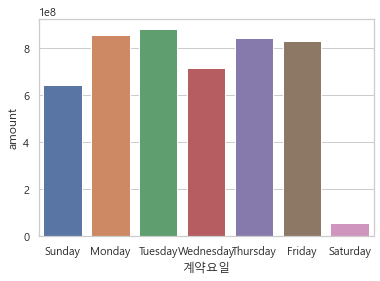

In [81]:
sns.barplot(data=df1, x='계약요일', y='amount', estimator=sum, ci=None)

### 주의 순서를 추출에서 시각화
* 1년은 52주임

In [82]:
#df1['계약주차'] = 
df1['계약주차'] = df1['datetime(timestamp)'].dt.week

<AxesSubplot:xlabel='계약주차', ylabel='amount'>

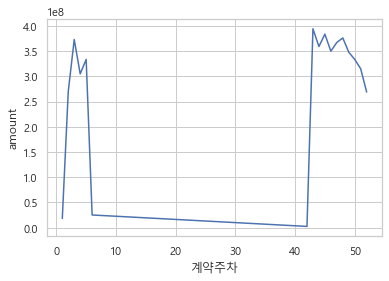

In [83]:
sns.lineplot(data=df1, x='계약주차', y='amount', estimator=sum, ci=None)

## pointplot()

In [84]:
df1['계약연도'] = df1['datetime(timestamp)'].dt.year

<AxesSubplot:xlabel='계약주차', ylabel='amount'>

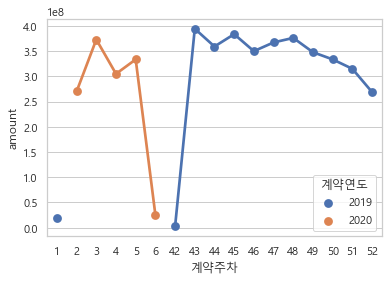

In [85]:
sns.pointplot(data=df1, x='계약주차', y='amount', ci=None, estimator=sum, hue='계약연도')

### 2019년도 데이터만 별도로 저장후 시각화

In [87]:
cond1 = df1['계약연도'] == 2019
df2 = df1[cond1]

<AxesSubplot:xlabel='계약주차', ylabel='amount'>

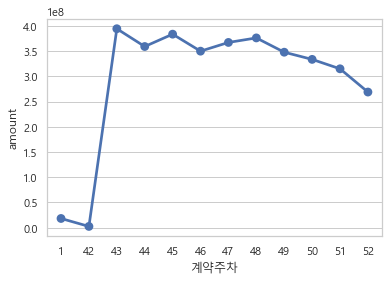

In [88]:
sns.pointplot(data=df2, x='계약주차', y='amount', ci=None, estimator=sum)

In [89]:
cond2 = df1['계약연도'] == 2020
df3 = df1[cond2]

<AxesSubplot:xlabel='계약주차', ylabel='amount'>

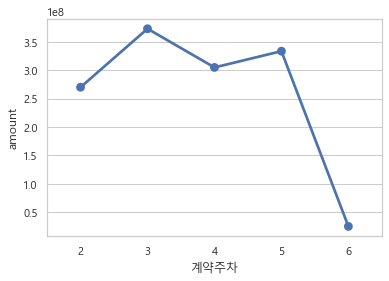

In [90]:
sns.pointplot(data=df3, x='계약주차', y='amount', ci=None, estimator=sum)